ThoraricSurgery.csv 정보


다음은 목표 변수(1년 생존 기간)를 예측하는 데 사용할 기능입니다.


아이디

DGN: 진단 - 1차 및 2차 및 여러 종양(DGN3, DGN2, DGN4, DGN6, DGN5, DGN8, DGN1)에 대한 ICD-10 코드의 특정 조합

PRE4: 강제 활력 용량 - FVC(숫자)

PRE5: 강제 만료 첫 번째 초가 끝날 때 배출된 볼륨 - FEV1(숫자)

PRE6: 실적현황 - Zubrod 규모(PRZ2,PRZ1,PRZ0)

PRE7: 수술 전 통증 (T,F)

PRE8: 수술 전 혈액투석 (T,F)

PRE9: 수술 전 호흡곤란 (T,F)

PRE10: 수술 전 기침 (T,F)

PRE11: 수술 전 약점(T,F)

PRE14: 임상 TNM에서 T - 원래 종양의 크기, OC11(가장 작음)에서 OC14(가장 큼) (OC11, OC14, OC12, OC13)

PRE17: 제2형 DM - 당뇨병 (T,F)

PRE19 : MI 최대 6개월 (T,F)

PRE25: PAD - 말초동맥질환 (T,F)

PRE30: 흡연 (T,F)

PRE32: 천식 (T,F)

AGE : 수술 연령(숫자)

Risk1Y: 생존기간 1년 - (T)사망시 참값 (T,F)


RATIOUS = PRE5/PRE4



In [3]:
import pandas as pd
df = pd.read_csv('datasets/ThoraricSurgery.csv', header=None) # header=None : 값이 컬럼으로 들어왔을 때 밑으로 내리기 (컬럼이 값으로 들어감)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [8]:
# X = df.drop(17, axis=1)
# y = df(17)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # 노드 만들기

np.random.seed(3)
tf.random.set_seed(3) # 랜덤값 지정

# 네크워크 구조
model = Sequential()
# 노드 쌓기
model.add(Dense(30, input_dim = 17, activation='sigmoid')) # Dense(노드개수, 피쳐개수, 필터)
model.add(Dense(1, activation='sigmoid')) # 0,1로 분류될떄 1개

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # accuracy : 분류일때만 사용, 회귀는 mse ...

model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - accuracy: 0.8561 - loss: 0.4188
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.8561 - loss: 0.4127
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8561 - loss: 0.4112
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.8561 - loss: 0.4103
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8561 - loss: 0.4097
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.8561 - loss: 0.4093
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8561 - loss: 0.4090
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.8561 - loss: 0.4088
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.8561 - loss: 0.4087
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.8561 - loss: 0.4085
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8561 - loss: 0.4084
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,715 (6.70 KB)

 Trainable params: 571 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,144 (4.47 KB)

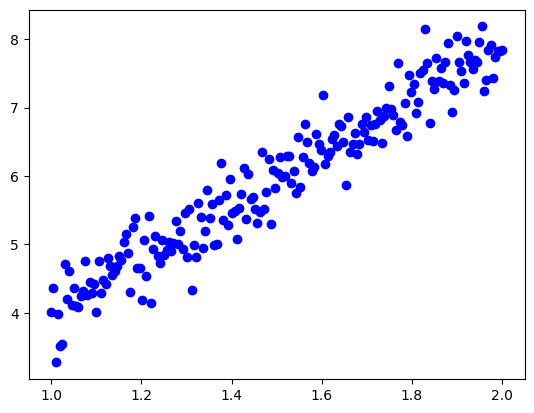

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = data = np.linspace(1, 2, 200) # 시작 : 1, 끝 : 2, 개수 : 200
y = X * 4 + np.random.randn(200) * 0.3 # 편차 0.3정도의 가우시안 잡음 추가

plt.scatter(data, y, c='b')
plt.show()

In [24]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(1, input_dim = 1, activation='linear')) # linear : y = x
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X, y, epochs=30, batch_size=1)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - loss: 28.6388 - mse: 28.6388 
Epoch 2/30
  1/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32.4090 - mse: 32.4090

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 23.8971 - mse: 23.8971
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - loss: 19.7819 - mse: 19.7819
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 16.2258 - mse: 16.2258
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 13.1752 - mse: 13.1752
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 10.5801 - mse: 10.5801
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 8.3939 - mse: 8.3939
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - loss: 6.5728 - mse: 6.5728
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - loss: 5.0755 - mse: 5.0755
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - loss: 3.8629 - mse: 3.8629
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - loss: 2.8979 - mse: 2.8979
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - loss: 2.1452 - mse: 2.1452
Epoch 13/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - loss: 1.5715 - mse: 1.5715
E

In [25]:
predict = model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


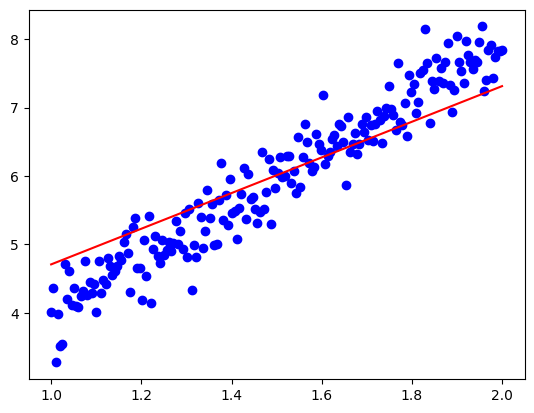

In [29]:
plt.scatter(X, y, c='b')
plt.plot(X, predict, c='r')
plt.show()